In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Load modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
#读取文件
ds=xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc",engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

In [4]:
ds['xch4']

<xarray.DataArray 'xch4' (time: 210, lat: 36, lon: 72)>
[544320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2003-01-16T12:00:00 2003-02-15 ... 2020-06-16
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
Attributes:
    standard_name:  dry_atmosphere_mole_fraction_of_methane
    long_name:      column-average dry-air mole fraction of atmospheric methane
    units:          1
    cell_methods:   time: mean
    fill_value:     1e+20
    comment:        Satellite retrieved column-average dry-air mole fraction ...

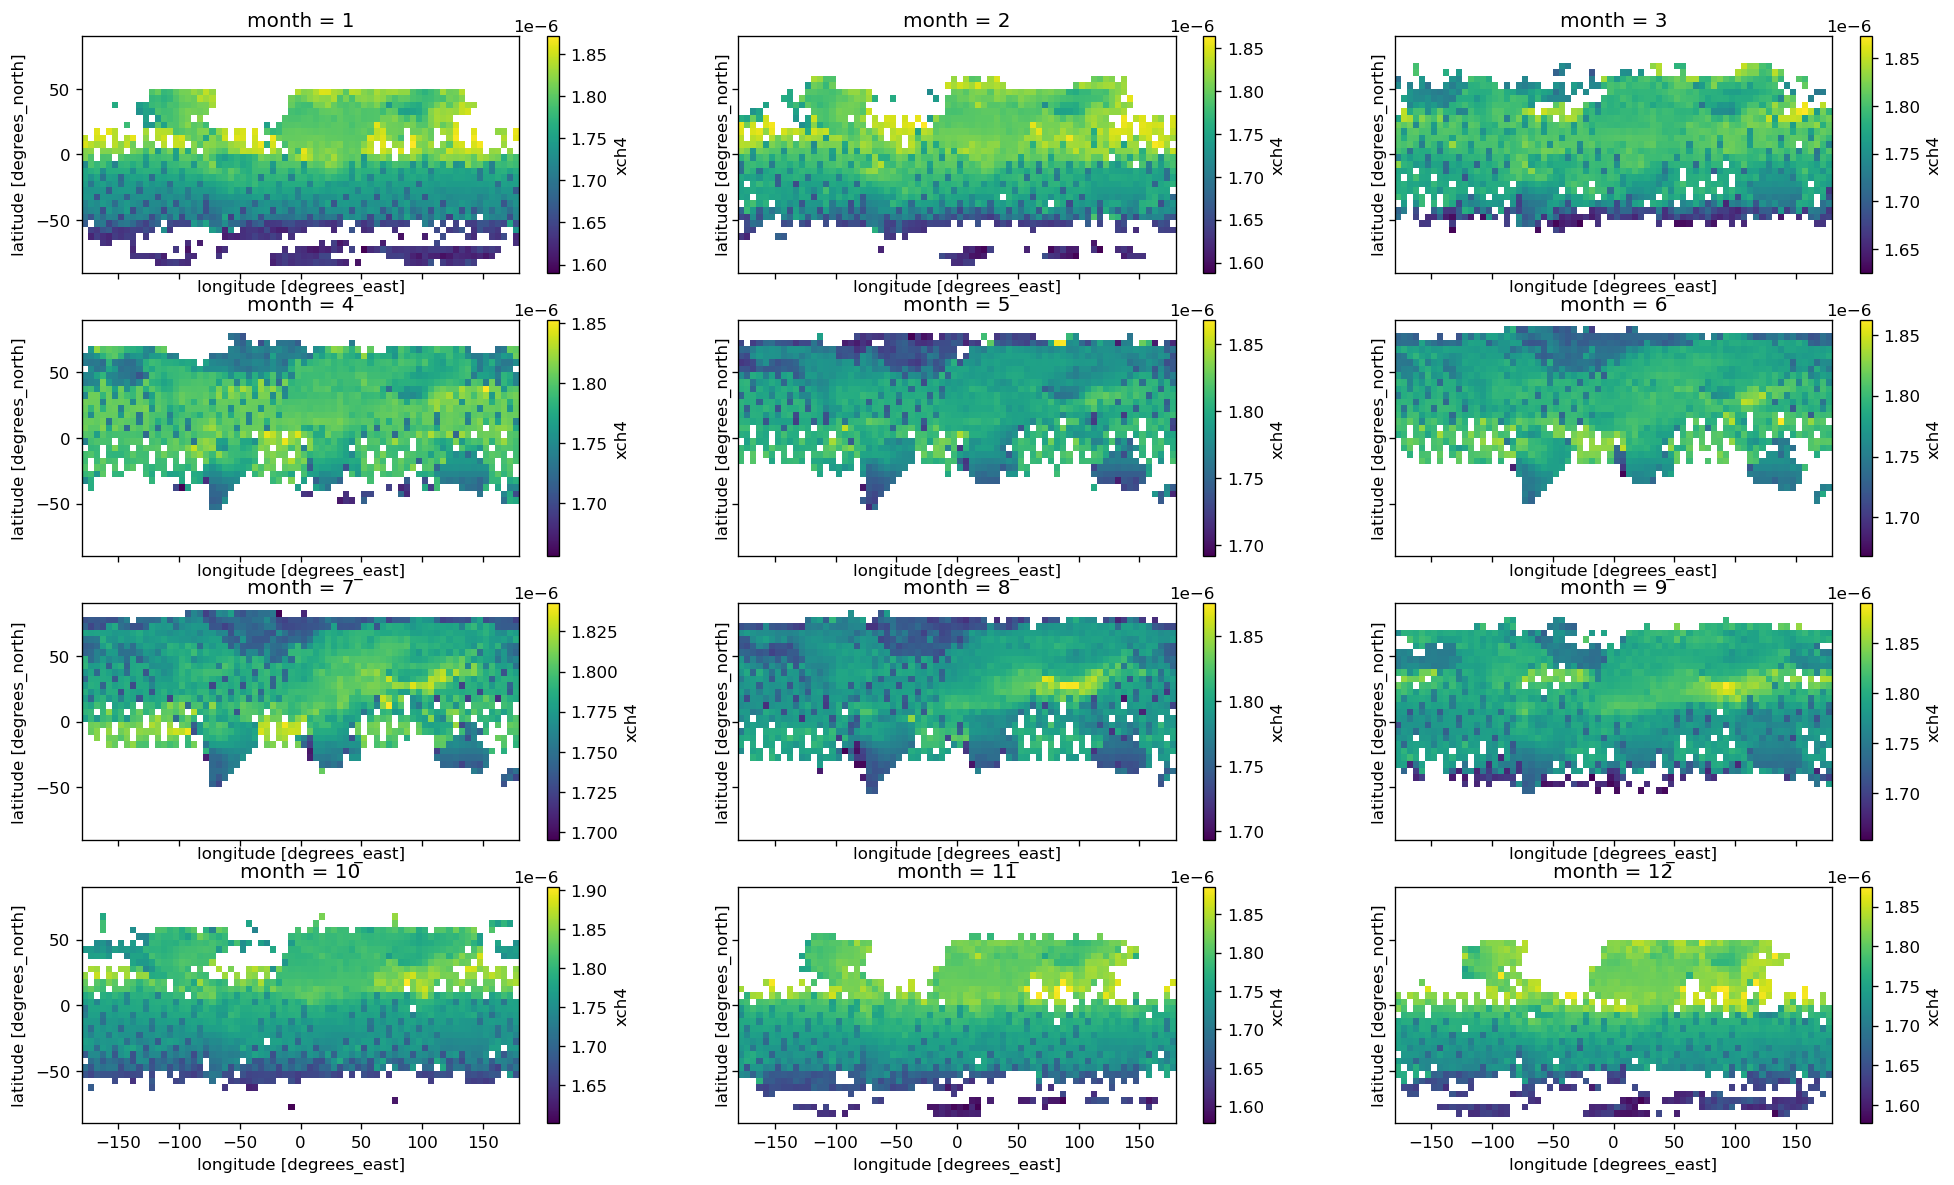

In [144]:
#1.1
#取出月平均
m=ds.xch4.groupby('time.month').mean()
#创建12幅表格
fig,axes=plt.subplots(4,3,figsize=(20,12),sharex=True,sharey=True,dpi=120)
#借鉴袁文婷，拉成一维数组
axes=axes.ravel()
#创建for loop将各月份填入其中
for i in range(12):
    axes[i]=plt.subplot(4,3,i+1)
    m[i,:,:].plot()

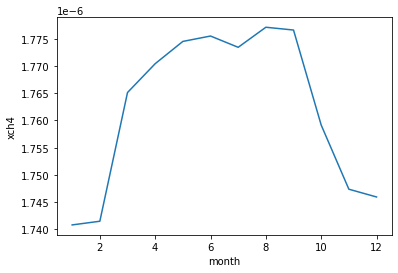

In [65]:
#CH4按月变化趋势
xch4_clim.mean(dim='lon').mean(dim='lat').transpose().plot()

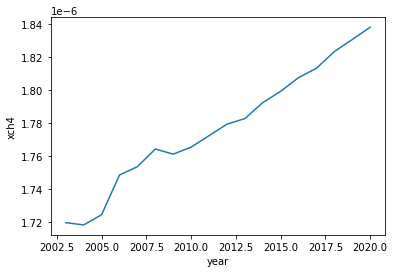

In [145]:
#1.2
#全球甲烷含量在逐步增加，并且含量增高趋势逐渐更加明显
ds.xch4.groupby(ds.time.dt.year)
xch4_year=ds.xch4.groupby('time.year').mean()
xch4_year.mean(dim=['lon','lat']).transpose().plot()

D:\python\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\python\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


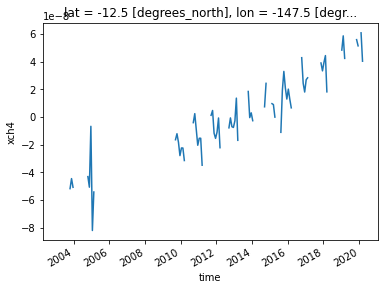

In [88]:
#1.3
#在南纬15度，西经150度处去季节性甲烷变化总体上在逐年增高
group_data=ds.xch4.groupby('time.month')
xch4_anom=group_data-group_data.mean(dim='time')
xch4_anom.sel(lon=-150,lat=-15,method='nearest').plot()

In [4]:
#2
SST=xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc",engine='netcdf4')
SST

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [5]:
SST['sst']

<xarray.DataArray 'sst' (time: 684, lat: 89, lon: 180)>
[10957680 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

In [6]:
#2.1
#在(5N-5S, 170W-120W)处计算温度的季节性变化
sst_clim=SST.sst.sel(lon=slice(120,170),lat=slice(-5,5)).groupby('time.month').mean()
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 5, lon: 26)>
array([[[29.028156, 29.124018, 29.130487, ..., 29.458986, 29.40671 ,
         29.358635],
        [29.027426, 29.153624, 29.129362, ..., 29.291643, 29.204933,
         29.120565],
        [28.849007, 28.912628, 28.852278, ..., 29.110067, 28.99955 ,
         28.881413],
        [28.612465, 28.634708, 28.546515, ..., 29.011509, 28.898874,
         28.79206 ],
        [28.40417 , 28.447857, 28.392477, ..., 28.926332, 28.847929,
         28.770119]],

       [[28.825596, 28.930664, 28.940992, ..., 29.35216 , 29.293056,
         29.238314],
        [28.833675, 28.988573, 28.985886, ..., 29.194006, 29.0958  ,
         28.999252],
        [28.68234 , 28.760672, 28.715094, ..., 29.009357, 28.88335 ,
         28.75082 ],
        [28.4706  , 28.487507, 28.394753, ..., 28.928986, 28.801754,
         28.684416],
        [28.25052 , 28.287918, 28.223717, ..., 28.879599, 28.797909,
...
         29.634012],
        [29.52841 , 29.521248, 29.439075, ..., 29.461407, 29.411896,
         29.378262],
        [29.469206, 29.49123 , 29.416918, ..., 29.265162, 29.185635,
         29.129591],
        [29.35844 , 29.388475, 29.340836, ..., 29.25499 , 29.164148,
         29.110823],
        [29.258398, 29.272776, 29.248367, ..., 29.318436, 29.257198,
         29.215263]],

       [[29.398111, 29.451107, 29.452528, ..., 29.62688 , 29.598337,
         29.573372],
        [29.383438, 29.455273, 29.41713 , ..., 29.432829, 29.369019,
         29.315294],
        [29.23622 , 29.28212 , 29.224049, ..., 29.233976, 29.140806,
         29.057495],
        [29.042618, 29.06313 , 28.99859 , ..., 29.160395, 29.058783,
         28.97982 ],
        [28.894953, 28.918709, 28.872938, ..., 29.127762, 29.056019,
         28.993029]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 120.0 122.0 124.0 126.0 ... 164.0 166.0 168.0 170.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [7]:
#进行去季节化，得到异常值
group_data=SST.sst.sel(lon=slice(120,170),lat=slice(-5,5)).groupby('time.month')
sst_anom=group_data-group_data.mean(dim='time')
sst_anom.sel(lon=slice(120,170),lat=slice(-5,5))
#对数据进行处理以三个月为尺度得到异常值
resample_obj = sst_anom.resample(time="3M")
ds_anom_resample = resample_obj.mean(dim="time")
ds_anom_resample

<xarray.DataArray 'sst' (time: 229, lat: 5, lon: 26)>
array([[[-0.4533596 , -0.43008804, -0.3652172 , ..., -0.5904255 ,
         -0.51613617, -0.5157356 ],
        [-0.14541245, -0.14106178, -0.20046997, ..., -0.60107803,
         -0.5806999 , -0.5200424 ],
        [ 0.03437614, -0.01860619, -0.1291542 , ..., -0.61279106,
         -0.5868416 , -0.55138206],
        [-0.03416824, -0.07881355, -0.139431  , ..., -0.5768242 ,
         -0.56368065, -0.5451031 ],
        [-0.11306   , -0.14630127, -0.18651962, ..., -0.47527504,
         -0.48386002, -0.49680328]],

       [[-0.29540953, -0.25229773, -0.21316402, ..., -0.6501789 ,
         -0.5796814 , -0.58689374],
        [-0.18128014, -0.12417793, -0.13654137, ..., -0.6904233 ,
         -0.68461037, -0.64244586],
        [-0.09715843, -0.08390108, -0.10546494, ..., -0.7069289 ,
         -0.6881733 , -0.6722056 ],
        [-0.18694179, -0.16128285, -0.128987  , ..., -0.64433545,
         -0.62889546, -0.6225446 ],
        [-0.27703476, -0.2525959 , -0.20511119, ..., -0.517519  ,
...
          0.51037025,  0.44631258],
        [ 0.31214967,  0.4855779 ,  0.7164224 , ...,  0.4436461 ,
          0.3200194 ,  0.2053426 ],
        [ 0.39565277,  0.5145791 ,  0.7320716 , ...,  0.39797845,
          0.23362541,  0.08429018],
        [ 0.44386673,  0.44989267,  0.5983505 , ...,  0.5368557 ,
          0.3789749 ,  0.21928024],
        [ 0.42669234,  0.40143776,  0.4725081 , ...,  0.714798  ,
          0.5879669 ,  0.46769652]],

       [[ 0.32543087,  0.3451271 ,  0.4029932 , ...,  0.51263714,
          0.4383192 ,  0.36778736],
        [ 0.42484474,  0.5078449 ,  0.57851505, ...,  0.34471035,
          0.22703075,  0.10994244],
        [ 0.5032301 ,  0.5828867 ,  0.66394806, ...,  0.27353382,
          0.13096333, -0.00620747],
        [ 0.46020794,  0.49208736,  0.58321095, ...,  0.37838078,
          0.25306892,  0.11438084],
        [ 0.3544016 ,  0.36249638,  0.44186687, ...,  0.5236778 ,
          0.4169016 ,  0.31012917]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-31 1960-04-30 ... 2017-01-31
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 120.0 122.0 124.0 126.0 ... 164.0 166.0 168.0 170.0

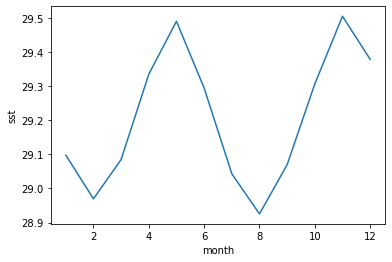

In [8]:
#2.2
#对季节性变化进行可视化
sst_clim.mean(dim=['lat','lon']).plot()

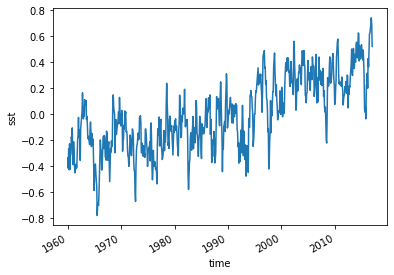

In [9]:
#对去季节性变化进行可视化
sst_anom.mean(dim=['lat','lon']).plot()

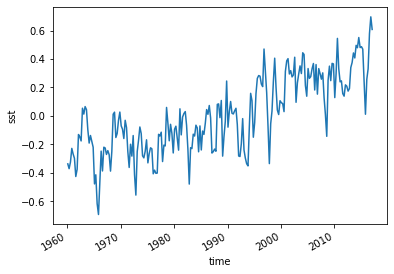

In [10]:
#以三个月为尺度的异常值可视化
ds_anom_resample.mean(dim=['lat','lon']).plot()

In [33]:
ds_anom_resample_m=ds_anom_resample.mean(dim=['lat','lon'])
ds_anom_resample_m

<xarray.DataArray 'sst' (time: 229)>
array([-0.33638978, -0.37003502, -0.3239999 , -0.22765496, -0.26742154,
       -0.29706082, -0.42516705, -0.3743719 , -0.13013509, -0.14662217,
       -0.17526981,  0.05451763,  0.01313595,  0.06591826,  0.04469279,
       -0.09537051, -0.19031097, -0.13719894, -0.1779783 , -0.21954633,
       -0.47708625, -0.41306534, -0.61572886, -0.6919386 , -0.46526185,
       -0.24677637, -0.38609752, -0.21915027, -0.22480527, -0.2702479 ,
       -0.2433737 , -0.27216244, -0.38718328, -0.24891156,  0.01236948,
        0.02674307, -0.1512471 , -0.12314105, -0.02989539,  0.02746935,
       -0.06977199, -0.09244606, -0.15824564, -0.03030802, -0.08215355,
       -0.24998821, -0.36153477, -0.19859119, -0.2819085 , -0.13750277,
       -0.41236964, -0.5556232 , -0.2498695 , -0.1719188 , -0.07733187,
       -0.12359207, -0.27969757, -0.29421753, -0.2476332 , -0.16733189,
       -0.32939062, -0.26420408, -0.22348669, -0.23065028, -0.4060981 ,
       -0.38037926, -0.402714  , -0.4010484 , -0.12891535, -0.1408334 ,
       -0.11381914, -0.32007325, -0.2045178 , -0.21054327,  0.05988208,
       -0.05048161, -0.17434482, -0.05864822, -0.12214249, -0.25969198,
       -0.09298059, -0.07176815, -0.1562431 , -0.24005908,  0.05026476,
       -0.13279352, -0.00744956,  0.01719128,  0.03076849, -0.06558541,
       -0.2355391 , -0.47826445, -0.22260715, -0.22947134, -0.12784567,
       -0.14085631, -0.06479608, -0.08387943, -0.2515224 , -0.06982005,
...
       -0.19591552, -0.01864021, -0.23917682, -0.29464397, -0.33528358,
       -0.35045642, -0.07411855,  0.15897055,  0.10697694, -0.14921309,
       -0.04572915,  0.1568192 ,  0.2641609 ,  0.28375474,  0.2797301 ,
        0.22447583,  0.20625184,  0.4701414 ,  0.31612307,  0.16429943,
       -0.07111615, -0.33452275, -0.05399809,  0.03474595,  0.23891602,
        0.40586895,  0.20059861,  0.04168706,  0.01015314,  0.10702178,
        0.09294897,  0.0868701 ,  0.03048421,  0.31326863,  0.38727093,
        0.40259364,  0.29476655,  0.3183891 ,  0.27422825,  0.28749415,
        0.4125064 ,  0.09602283,  0.23268497,  0.294751  ,  0.35175908,
        0.2979943 ,  0.4437765 ,  0.4319937 ,  0.21467721,  0.13865069,
        0.33312672,  0.26419055,  0.2758488 ,  0.33165234,  0.36844757,
        0.18227148,  0.3608378 ,  0.15332824,  0.33264446,  0.2980027 ,
        0.2584041 ,  0.30271897,  0.12783696,  0.01041856, -0.14296326,
        0.25190043,  0.3500043 ,  0.2480731 ,  0.36936525,  0.36543158,
        0.12898877,  0.29491633,  0.54474586,  0.3310301 ,  0.23948544,
        0.24682468,  0.15716833,  0.13909237,  0.21837936,  0.209491  ,
        0.17454773,  0.19300571,  0.34000415,  0.3749026 ,  0.442632  ,
        0.40747023,  0.4960373 ,  0.4790274 ,  0.5508579 ,  0.48036876,
        0.48651356,  0.469067  ,  0.24312   ,  0.01210874,  0.25750467,
        0.33146283,  0.57795835,  0.6961747 ,  0.6076585 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-31 1960-04-30 ... 2017-01-31

In [40]:
#上色及划线部分参考袁文婷同学
df=pd.DataFrame(ds_anom_resample_m.where(ds_anom_resample_m>=0),columns=['anom>=0'])
df['anom<0']=pd.DataFrame(ds_anom_resample_m.where(ds_anom_resample_m<0))
df['date'] = pd.DataFrame(ds_anom_resample_m.time)
df.set_index('date',inplace=True)
df

,anom>=0,anom<0
date,,
1960-01-31,NaN,-0.336390
1960-04-30,NaN,-0.370035
1960-07-31,NaN,-0.324000
1960-10-31,NaN,-0.227655
1961-01-31,NaN,-0.267422
...,...,...
2016-01-31,0.257505,NaN
2016-04-30,0.331463,NaN
2016-07-31,0.577958,NaN


Text(0.5, 1.0, 'SST Anomaly in Nino 3.4 Region')

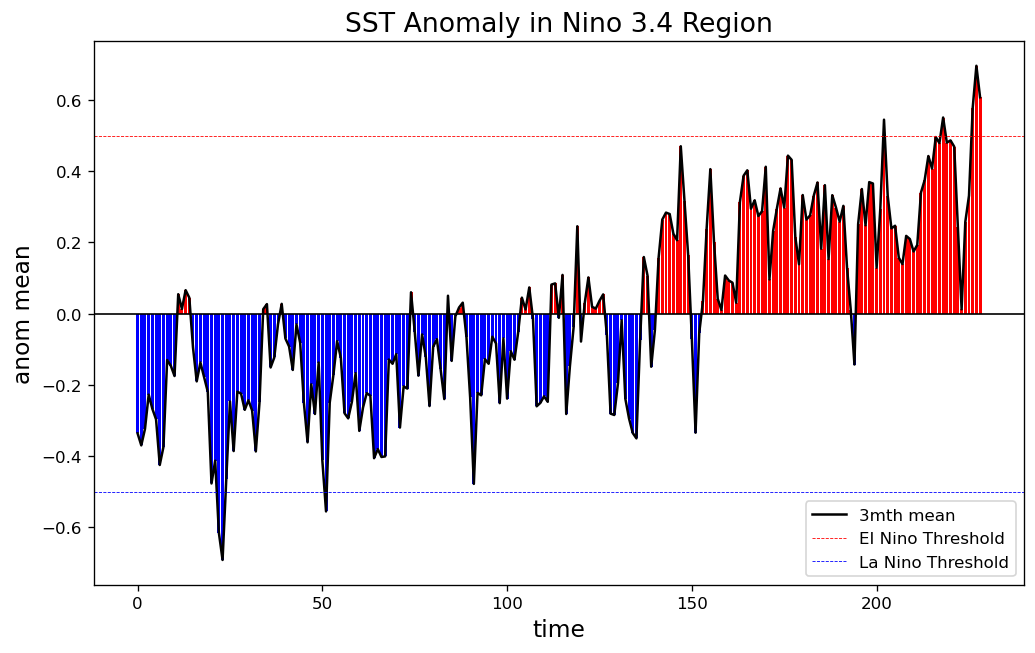

In [42]:
#根据正负进行上色
plt.figure(figsize=(10,6),dpi=120)
plt.bar(np.arange(len(df['anom>=0'])),df['anom>=0'],color="red")
plt.bar(np.arange(len(df['anom<0'])),df['anom<0'],color="blue")
plt.plot(ds_anom_resample_m,'k-')
#作出0，0.5，-0.5三条线，设置图例
plt.axhline(y=0.5,color="red",linestyle='--',linewidth=0.5)
plt.axhline(y=-0.5,color="blue",linestyle='--',linewidth=0.5)
plt.axhline(y=0,color="black",linestyle='-',linewidth=1)
plt.legend(labels=['3mth mean','EI Nino Threshold','La Nino Threshold'],loc=4)
plt.ylabel('anom mean',fontsize=14)
plt.xlabel('time',fontsize=14)
plt.title('SST Anomaly in Nino 3.4 Region',fontsize=16)

In [11]:
#加载文档，因不知道如何下载所以使用课堂文件
da= xr.open_dataset("sst.mnmean.nc", engine="netcdf4")
da

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2026, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-10-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-11-04

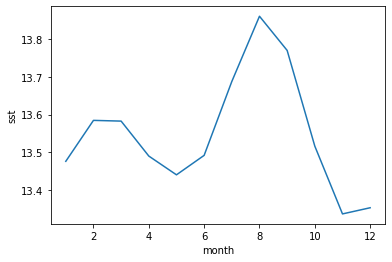

In [12]:
#3.1
#制作出sst的季节性变化
sst_climm=da.sst.groupby("time.month").mean()
sst_climm.mean(dim=['lon','lat']).plot()

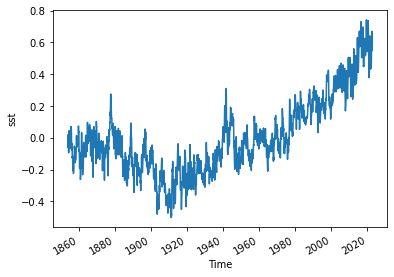

In [14]:
#去季节性
group_dataa=da.sst.groupby("time.month")
sst_anomm=group_dataa-group_dataa.mean('time')
sst_anomm.mean(dim=['lon','lat']).plot()

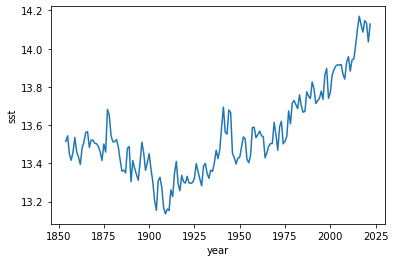

In [13]:
#3.2
#sst随年份变化
sst_1=da.sst.groupby("time.year").mean()
sst_1.mean(dim=['lon','lat']).plot()

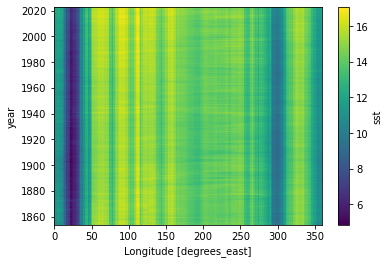

In [15]:
#sst随年份和经度变化
sst_1.mean(dim='lat').plot()

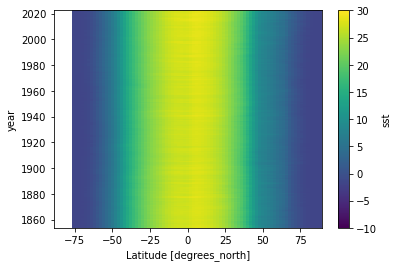

In [21]:
#sst随年份和纬度变化
sst_1.mean(dim='lon').plot(vmin=-10,vmax=30)

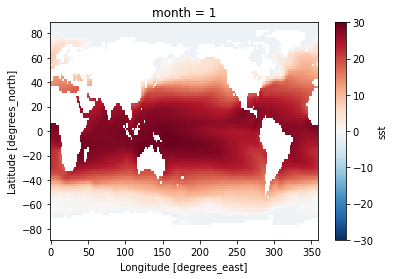

In [23]:
#每年一月份温度分布
group_dataa.mean().sel(month=1).plot()

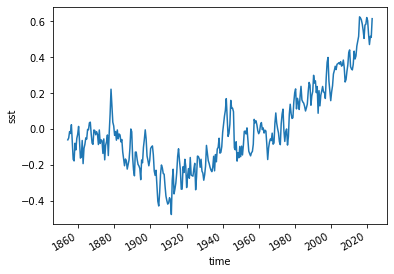

In [26]:
#以半年为周期重新处理年度变化
resample_ob = sst_anomm.resample(time="6M")
da_anom_resample = resample_ob.mean(dim="time")
da_anom_resample.mean(dim=['lon','lat']).plot()

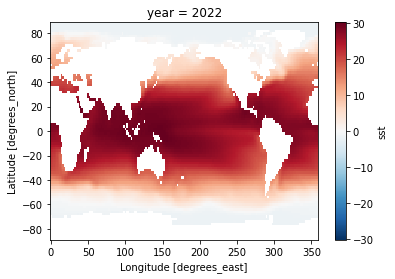

In [30]:
#sst在特定时间上的经纬度分布
sst_1.isel(year=-1).plot()